In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

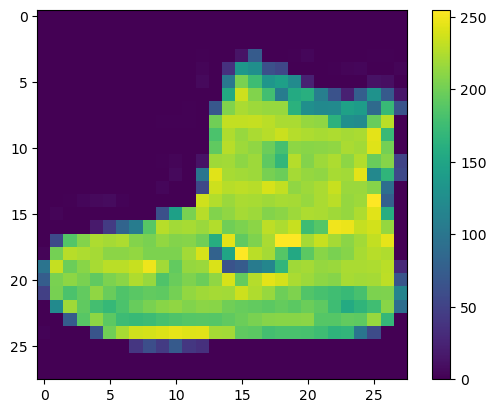

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

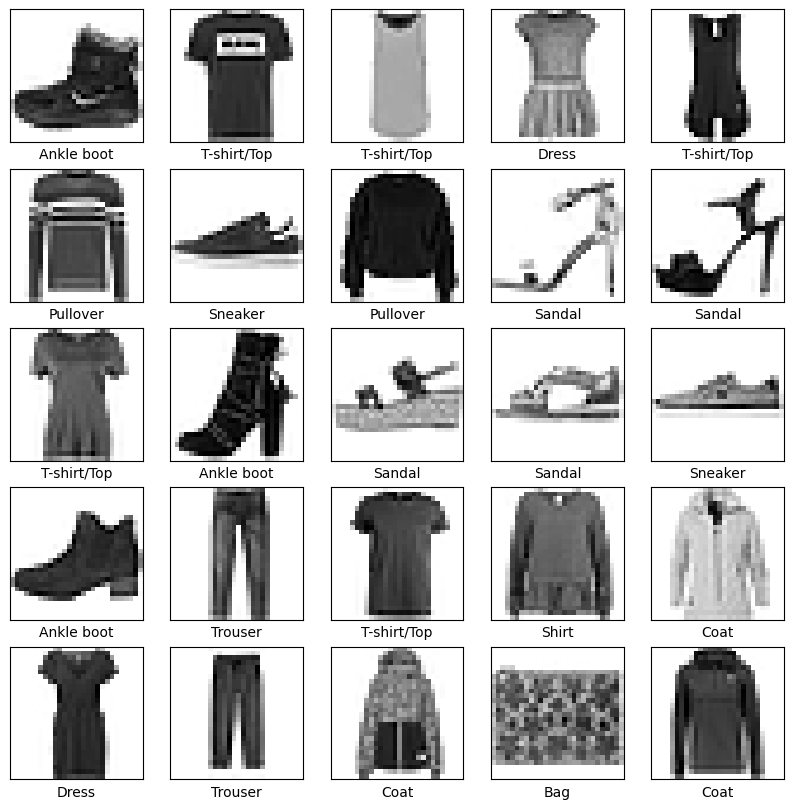

In [12]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [15]:
history = model.fit(train_images.astype(np.float32), 
                    train_labels.astype(np.float32), 
                    epochs = 30, 
                    validation_split = 0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5234 - accuracy: 0.8159 - val_loss: 0.4262 - val_accuracy: 0.8425
Epoch 2/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3873 - accuracy: 0.8605 - val_loss: 0.3691 - val_accuracy: 0.8697
Epoch 3/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3429 - accuracy: 0.8757 - val_loss: 0.3555 - val_accuracy: 0.8688
Epoch 4/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3172 - accuracy: 0.8849 - val_loss: 0.3636 - val_accuracy: 0.8688
Epoch 5/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2984 - accuracy: 0.8896 - val_loss: 0.3343 - val_accuracy: 0.8802
Epoch 6/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.8959 - val_loss: 0.3269 - val_accuracy: 0.8806
Epoch 7/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2714 - accuracy: 0.9010 - val_loss: 0.3152 - val_accuracy:

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\n Test Accuracy : ', test_acc)

313/313 - 1s - loss: 0.4118 - accuracy: 0.8876 - 653ms/epoch - 2ms/step

 Test Accuracy :  0.8876000046730042


In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [19]:
predictions[0]

array([1.5327409e-12, 7.6368880e-15, 2.7355274e-10, 1.4603455e-10,
       3.5847231e-14, 1.2157778e-07, 3.1270598e-12, 3.7287835e-05,
       1.1247893e-09, 9.9996257e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})". format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color = color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

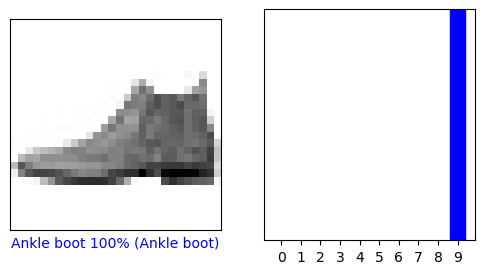

In [23]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

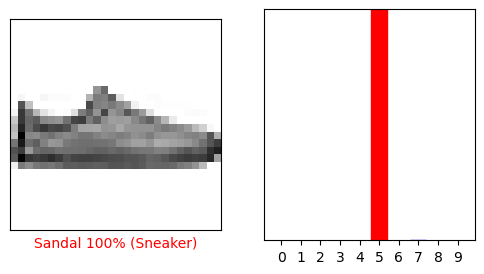

In [24]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

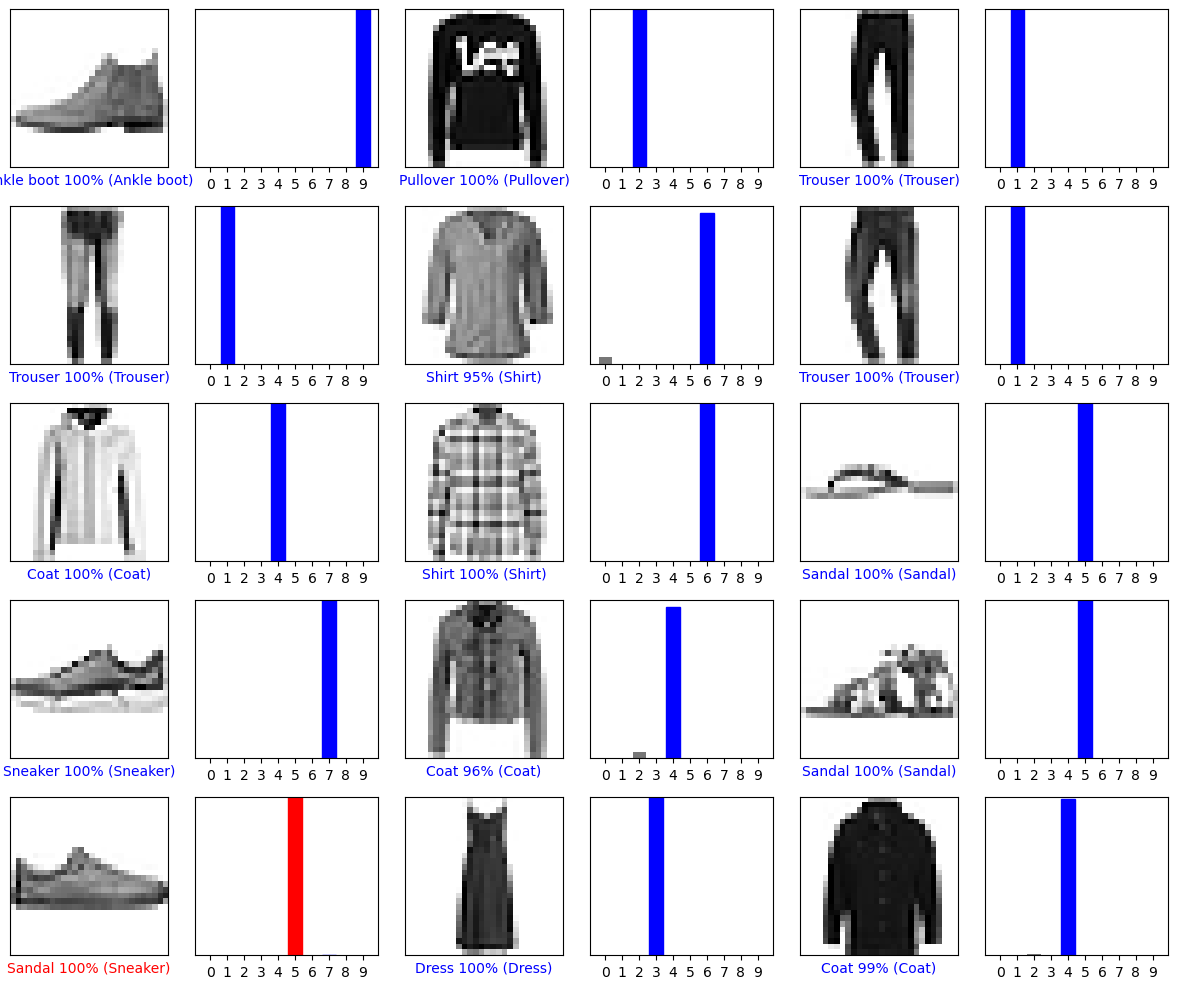

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

In [26]:
img = test_images[1]
print(img.shape)

(28, 28)


In [27]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[7.3006568e-06 1.1925778e-18 9.9988353e-01 1.5731447e-16 8.8898829e-05
  1.5194423e-17 2.0262241e-05 5.5859967e-29 7.9440504e-16 2.1592572e-18]]


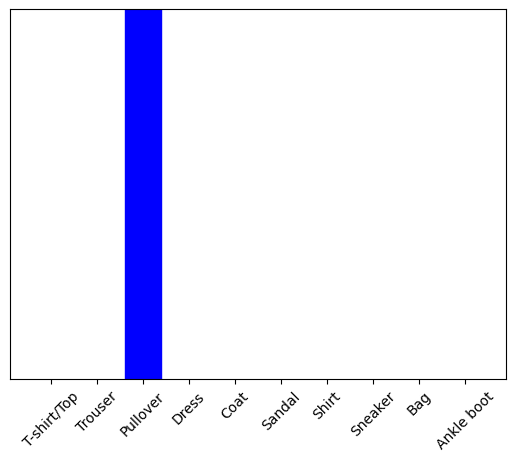

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)
plt.show()